In [63]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
sns.set(style="darkgrid", context='notebook', palette='deep')

# 1. Data Exploration

## 1-1. Loading

In [64]:
train_df = pd.read_csv('../data/input/train.csv')
test_df = pd.read_csv('../data/input/test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Features
- Catergorical: Pclass, Sex, Embarked
- Numerical: PassengerId, Age, SibSp, Parch, Fare
- Text: Name, Ticket, Cabin

### Label
- Survived

## 1-2. Handling Outliers
Age, SibSp, Parch, Fare

In [66]:
from utils import detect_outliers
idx_to_drop = detect_outliers(train_df, 3, ['Age', 'SibSp', 'Parch', 'Fare'])
train_df.loc[idx_to_drop]

/Users/jsaon/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [67]:
train_df.drop(idx_to_drop, inplace=True)
train_df.reset_index(drop=True, inplace=True)

## 1-3. Joining Train and Test Set

In [68]:
train_len = len(train_df)
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

## 1-4. Checking

In [69]:
df.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [70]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1043.000000,1298.000000,1299.000000,1299.000000,1299.000000,1299.000000,881.000000
mean,29.903806,32.569058,0.372594,657.093149,2.294072,0.452656,0.385925
std,14.427548,50.694652,0.857157,377.743244,0.837150,0.879416,0.487090
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,331.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,657.000000,3.000000,0.000000,0.000000
75%,39.000000,30.646850,0.000000,984.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [71]:
df.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,292,1297,1299,1299,1299
unique,186,3,1297,2,929
top,G6,S,"Connolly, Miss. Kate",male,CA 2144
freq,5,904,2,838,8


# 2. Features Analysis

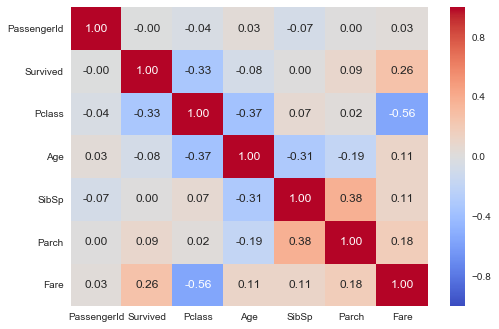

In [72]:
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm');

# Pclass

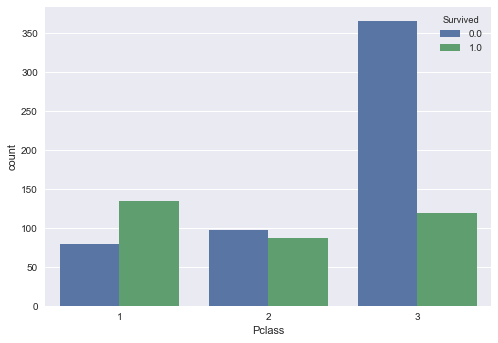

In [73]:
g = sns.countplot(x='Pclass', hue='Survived', data=df)

# Sex

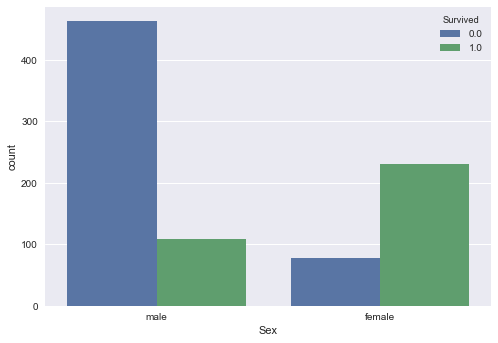

In [74]:
g = sns.countplot(x='Sex', hue='Survived', data=df)

In [75]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Age

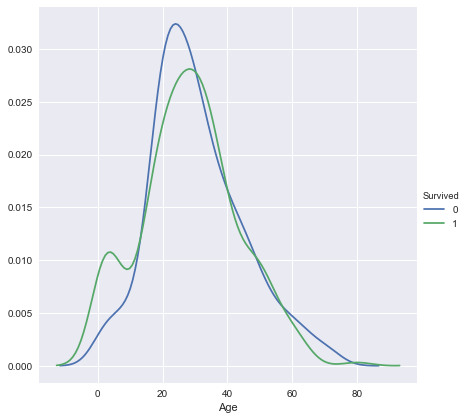

In [76]:
g = sns.FacetGrid(train_df, hue='Survived', size=6)
g = g.map(sns.kdeplot, "Age")
g.add_legend();

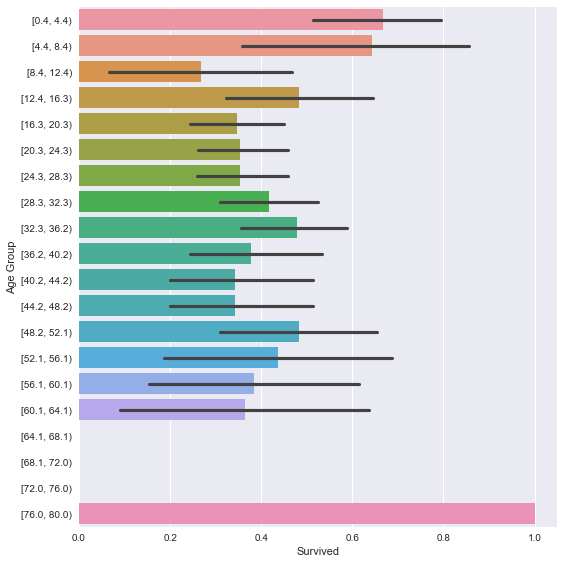

In [77]:
from utils import bar_with_bin
bar_with_bin('Survived', 'Age', train_df, kind='bar', size=8)

In [78]:
df[df['Age'] > 76]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
623,80.0,A23,S,30.0,"Barkworth, Mr. Algernon Henry Wilson",0,631,1,0,0,1.0,27042


In [79]:
df.drop(623, inplace=True)
df.reset_index(drop=True, inplace=True)
train_len -= 1

# SibSp

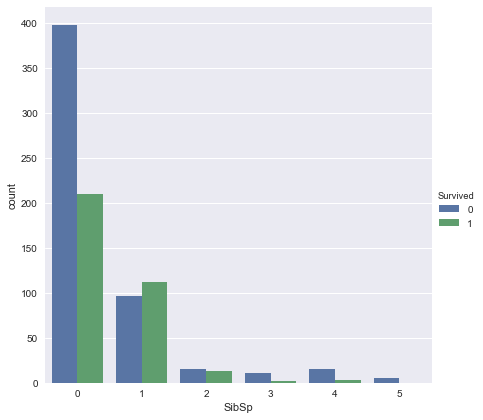

In [80]:
g = sns.factorplot(x='SibSp', hue='Survived', data=train_df, kind='count', size=6)

# Parch

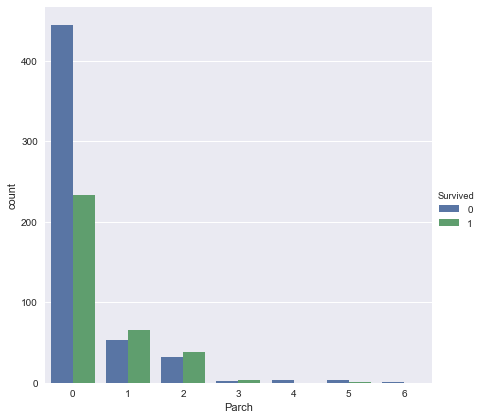

In [81]:
g = sns.factorplot(x='Parch', hue='Survived', data=train_df, kind='count', size=6)

# Fare

In [82]:
df[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1032,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,0,0,NaN,3701



Since Fare is highly related to Pclass, I fill it by the median of others in same Pclass

In [83]:
df.loc[df['Pclass'] == 3, 'Fare'].median()

8.05

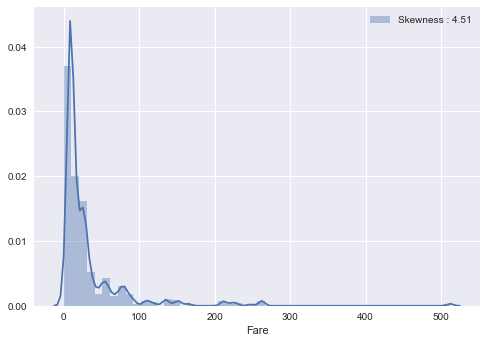

In [84]:
df["Fare"].fillna(8.05, inplace=True)

g = sns.distplot(df["Fare"], label="Skewness : %.2f"%(df["Fare"].skew()))
g = g.legend()

apply log on Fare to reduce the skewness

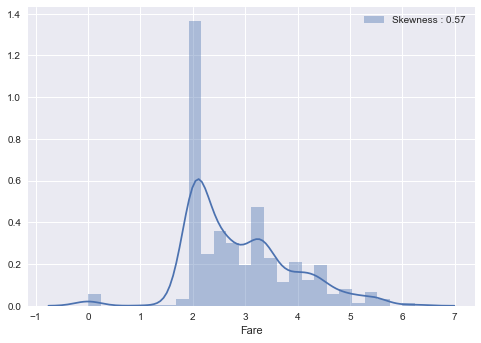

In [85]:
df["Fare"] = df["Fare"].map(lambda x: np.log(x) if x > 0 else 0)

g = sns.distplot(df["Fare"], label="Skewness : %.2f"%(df["Fare"].skew()))
g = g.legend()

## Embarked

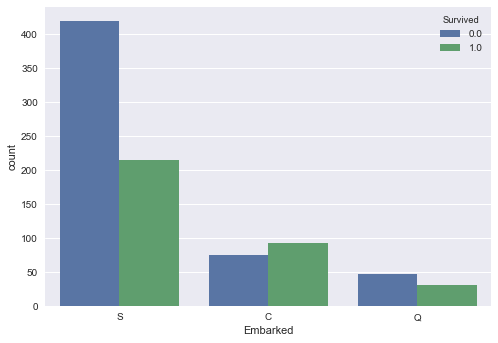

In [86]:
g = sns.countplot(x='Embarked', hue='Survived', data=df)

In [87]:
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
60,38.0,B28,NaN,4.382027,"Icard, Miss. Amelie",0,62,1,1,0,1.0,113572
820,62.0,B28,NaN,4.382027,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,1,0,1.0,113572


In [88]:
df[(df['Pclass'] == 1) & (df['Survived'] == 1)].groupby('Embarked').size()

Embarked
C    59
Q     1
S    71
dtype: int64

In [89]:
df['Embarked'].fillna('S', inplace=True)

# 4. Filling missing Data

3. Age

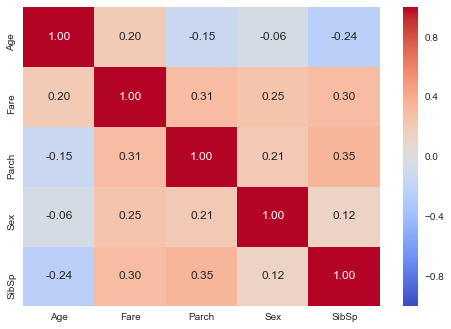

In [90]:
g = sns.heatmap(df[['Age', 'Fare', 'Parch', 'Sex', 'SibSp']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [91]:
def fill_Nan_with_group_median(df, x, features):
    index = df[x].isnull()
    total_median = df[x].median()
    length = len(df)
    for i, row in df[index].iterrows():
        mask = pd.Series(np.ones(length, dtype=bool))
        for col in features:
            mask = mask & (df[col] == row[col])
        group_median = df.loc[mask, x].median()
        if np.isnan(group_median):
            row[x] = total_median
        else:
            row[x] = group_median
        df.iloc[i] = row
fill_Nan_with_group_median(df, 'Age', ['Fare', 'Parch', 'Sex', 'SibSp'])

In [92]:
df.isnull().sum()

Age               0
Cabin          1007
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

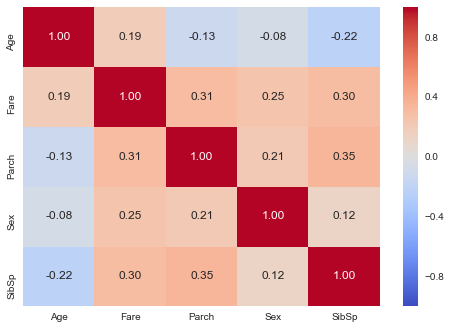

In [93]:
g = sns.heatmap(df[['Age', 'Fare', 'Parch', 'Sex', 'SibSp']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

# 3. Feature Engineering

## 3-1. Embarked

In [94]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Em')

## 3-1. Cabin

In [95]:
df['nCabin'] = pd.Series([1 + x.count(' ') if not pd.isnull(x) else 0
                          for x in df['Cabin']])
df['Cabin'] = pd.Series([x[0] if not pd.isnull(x) else 'X' for x in df['Cabin']])
df.head() 

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S,nCabin
0,22.0,X,1.981001,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0,0,1,0
1,38.0,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,1,0,0,1
2,26.0,X,2.070022,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0,0,1,0
3,35.0,C,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,0,0,1,1
4,35.0,X,2.085672,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0,0,1,0


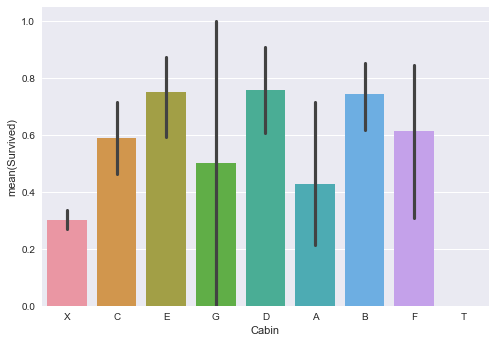

In [96]:
g = sns.barplot(x='Cabin', y='Survived', data=df)

In [97]:
df = pd.get_dummies(df, columns=['Cabin'], prefix='Cab')

## 3-2. Name

In [98]:
df['Name_length'] = df['Name'].str.len()
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

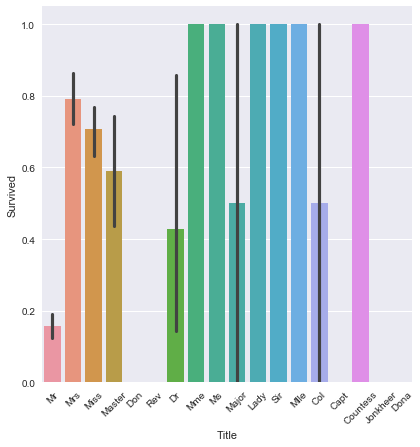

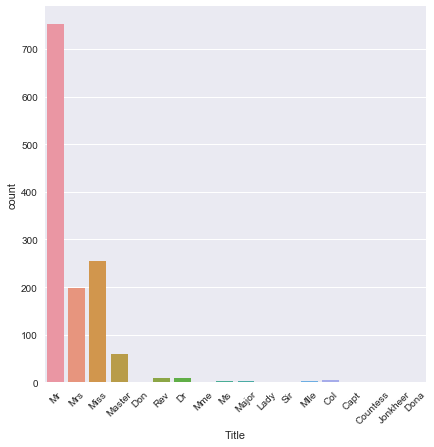

In [99]:
g = sns.factorplot(x='Title', y='Survived', data=df, kind='bar', size=6)
g.set_xticklabels(rotation=45)
g = sns.factorplot(x='Title', data=df, kind='count', size=6)
g.set_xticklabels(rotation=45);

In [100]:
df['Title'].replace(['Mlle', 'Ms', 'Mrs', 'Mme'], 'Miss', inplace=True)
df['Title'].replace(['Countess', 'Dona', 'Lady', 'Major', 'Sir', 'Jonkheer'],
                     'Rare', inplace=True)
df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Rev'],
                     'Officer', inplace=True)
df[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.589744
Miss,0.745098
Mr,0.156250
Officer,0.235294
Rare,0.666667


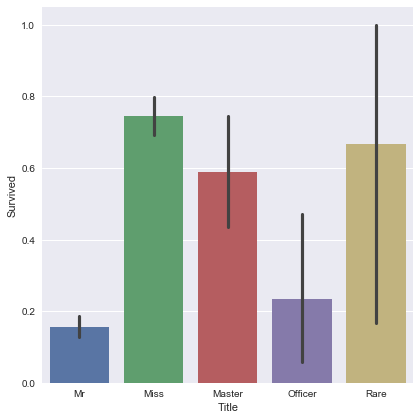

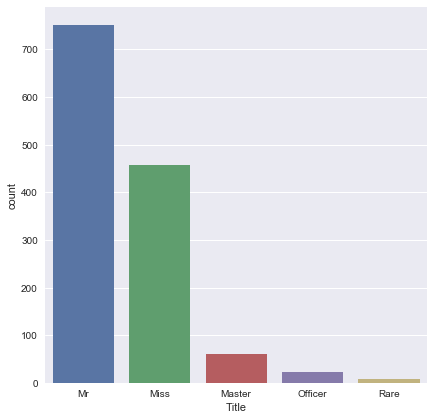

In [101]:
g = sns.factorplot(x='Title', y='Survived', data=df, kind='bar', size=6)
g = sns.factorplot(x='Title', data=df, kind='count', size=6)

In [102]:
df.drop('Name', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Title'], prefix='Title')

In [103]:
df.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Em_C,...,Cab_F,Cab_G,Cab_T,Cab_X,Name_length,Title_Master,Title_Miss,Title_Mr,Title_Officer,Title_Rare
0,22.0,1.981001,0,1,3,0,1,0.0,A/5 21171,0,...,0,0,0,1,23,0,0,1,0,0
1,38.0,4.266662,0,2,1,1,1,1.0,PC 17599,1,...,0,0,0,0,51,0,1,0,0,0
2,26.0,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,0,...,0,0,0,1,22,0,1,0,0,0
3,35.0,3.972177,0,4,1,1,1,1.0,113803,0,...,0,0,0,0,44,0,1,0,0,0
4,35.0,2.085672,0,5,3,0,0,0.0,373450,0,...,0,0,0,1,24,0,0,1,0,0


## 3-3. Ticket

In [104]:
df['sameTicket'] = df.groupby('Ticket')['Ticket'].transform('count')

df['Ticket'] = pd.Series([x.replace('.', '').replace('/', '').strip().split()[0]
                          if not x.isdigit() else 'X' 
                          for x in df['Ticket']])

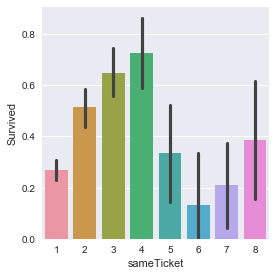

In [105]:
sns.factorplot(x='sameTicket', y='Survived', data=df, kind='bar');

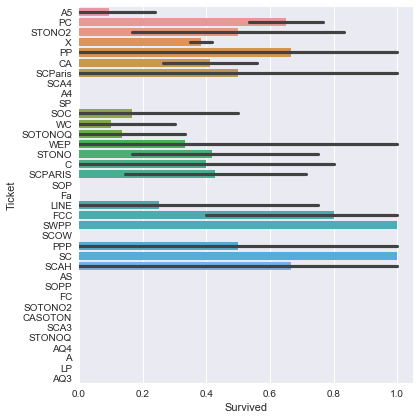

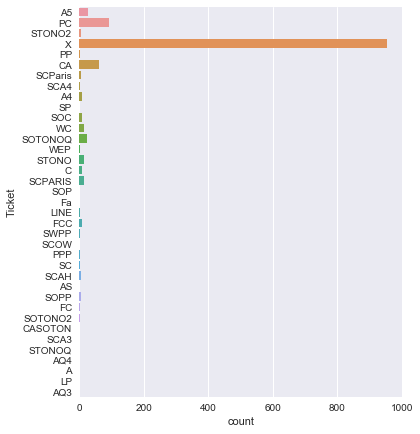

In [106]:
g = sns.factorplot(y='Ticket', x='Survived', data=df, kind='bar', orient='h', size=6)
g = sns.factorplot(y='Ticket', data=df, kind='count', orient='h', size=6)

In [107]:
df = pd.get_dummies(df, columns=['Ticket'], prefix='T')
df.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Em_C,Em_Q,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,22.0,1.981001,0,1,3,0,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,4.266662,0,2,1,1,1,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,2.070022,0,3,3,1,0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,3.972177,0,4,1,1,1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,0,5,3,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 3-4. Family

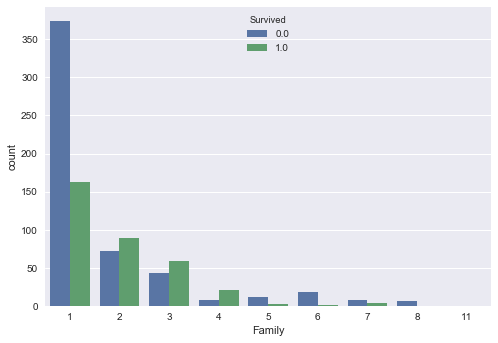

In [108]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

g = sns.countplot(x='Family', hue='Survived', data=df)

In [109]:
df.drop('PassengerId', axis=1, inplace=True)

In [111]:
from utils import encode_as_band
df['Child'] = (df['Age'] < 10).astype(int)
df = encode_as_band(df, ['Age', 'Fare', 'Name_length'])
df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Em_C,Em_Q,Em_S,...,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Family,Child
0,1,1,0,3,0,1,0.0,0,0,1,...,0,0,0,0,0,0,0,0,2,0
1,2,3,0,1,1,1,1.0,1,0,0,...,0,0,0,0,0,0,0,0,2,0
2,1,1,0,3,1,0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,2,3,0,1,1,1,1.0,0,0,1,...,0,0,0,0,0,0,0,1,2,0
4,2,1,0,3,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


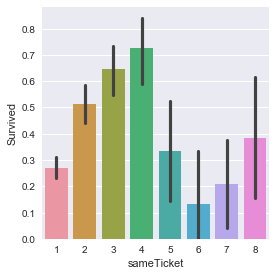

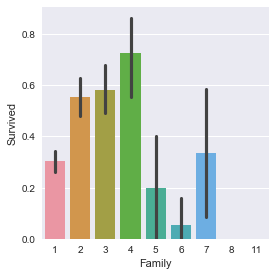

In [55]:
g = sns.factorplot(x='sameTicket', y='Survived', data=df, kind='bar')
g = sns.factorplot(x='Family', y='Survived', data=df, kind='bar')

In [112]:
df = encode_as_band(df, ['Family', 'sameTicket'], bins=[0, 1, 2, 4, 100])
df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Em_C,Em_Q,Em_S,...,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Family,Child
0,1,1,0,3,0,1,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,3,0,1,1,1,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,3,1,0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2,3,0,1,1,1,1.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,2,1,0,3,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Onehot Encoding

In [58]:
from utils import onehot_encoding
df = onehot_encoding(df, ['Pclass', 'Age', 'Fare', 'Name_length', 'Family', 'sameTicket'])
df.head()

,Parch,Sex,SibSp,Survived,Em_C,Em_Q,Em_S,nCabin,Cab_A,Cab_B,...,Name_length_3,Name_length_4,Family_0,Family_1,Family_2,Family_3,sameTicket_0,sameTicket_1,sameTicket_2,sameTicket_3
0,0,0,1,0.0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,1,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,1.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,1,1,1.0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [113]:
train_df = df[:train_len]
test_df = df[train_len:].drop('Survived', axis=1)

train_df.to_csv('../data/preprocessed/band/train.csv', index=False)
test_df.to_csv('../data/preprocessed/band/test.csv', index=False)
train_df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Em_C,Em_Q,Em_S,...,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Family,Child
0,1,1,0,3,0,1,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,3,0,1,1,1,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,3,1,0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2,3,0,1,1,1,1.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,2,1,0,3,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [61]:
train_df.shape

(880, 86)

In [62]:
train_df.corr()['Survived']

Parch            0.093573
Sex              0.547732
SibSp            0.004083
Survived         1.000000
Em_C             0.168034
Em_Q             0.002789
Em_S            -0.149099
nCabin           0.276295
Cab_A            0.011325
Cab_B            0.175450
Cab_C            0.109312
Cab_D            0.151025
Cab_E            0.145607
Cab_F            0.057912
Cab_G            0.015937
Cab_T           -0.026700
Cab_X           -0.311781
Title_Master     0.090500
Title_Miss       0.539928
Title_Mr        -0.554993
Title_Officer   -0.043242
Title_Rare       0.047917
T_A                   NaN
T_A4            -0.070883
T_A5            -0.093171
T_AQ3                 NaN
T_AQ4                 NaN
T_AS            -0.026700
T_C              0.002295
T_CA             0.010932
                   ...   
T_WC            -0.062837
T_WEP           -0.006237
T_X             -0.011243
Child            0.137984
Pclass_1         0.280295
Pclass_2         0.092552
Pclass_3        -0.316589
Age_0       